## McCulloch Pitts
#### AhmadReza Nopoush | student id: 610301194

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

#### Intro:
in this notebook I'm tring to convert a dfa to a McCulloch Pitts. at first I explain what McCulloch Pitts is, then I show the way that we can convert a dfa. at the end I implement the code.

#### McCulloch-Pitts:
McCulloch-Pitts developed a mathematical model know as linear threshold gate, which is defined as:

Sum = sigme(1 to n; Ii * Wi) which:
1. I1, I2, I3,…IN’ are binary input value ∈ 0,1.
2. W1, W2, W3,…WN’ are weights associated with each input having positive/negative magnitude i.e., ∈ -1,1.
3. ‘Sum’ is the weighted sum of inputs.
4. ‘T’ is the predefined threshold value for neuron activation (i.e., firing).

if Sum >= T, the treshold function will return 1 and o.w. return 0.

with this definition, we can model logical gates and circuits.

#### dfa to State Machine:
with the given state table, we can convert the dfa to the state machine as below.

the meaning of symbols:
1. A1: the left digit of binary number of state
2. A0: the right digit of binary number of state
3. x: the input or dfa transition
4. A1`: the left digit of next state.
5. A0`: the right digit of next state.
6. y: output or acceptence of expression.

after drawing state table, we can simplify the expressions with K-maps. after simplification we have:
1. A1`: A1A0 + !x(A0 + A1)
2. A0`: x + A1
3. y: A1A0 + !xA1




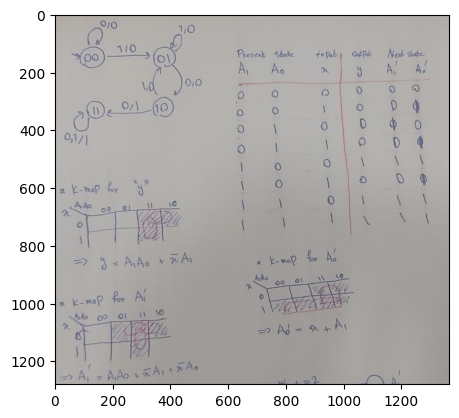

In [2]:
image = mpimg.imread("pic1.jfif")
plt.imshow(image)
plt.show()

#### State Machine to neuron:
Now we should convert each state to neuron. each neuron represent one of the (A0', A1', y). each neuron has 3 inputs(A0, A1, x) that are connected with a weighted edge to the activiation function. I compute the wights by guessing and checking if the wights are apporprate or not. we have the neuron as below:

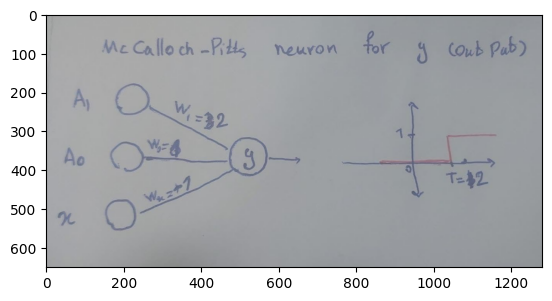

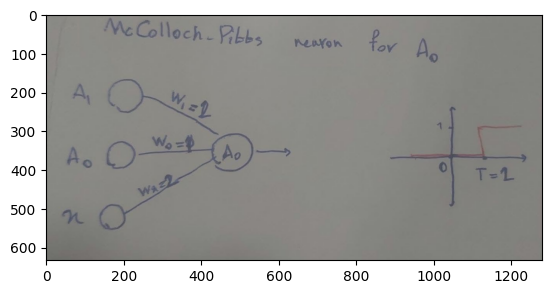

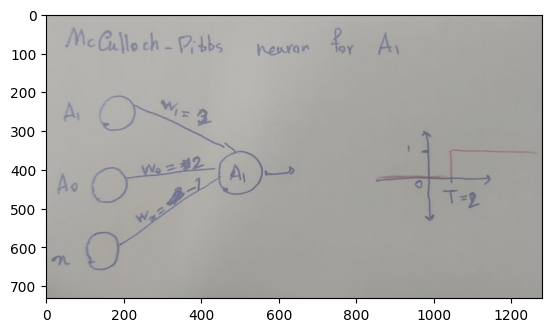

In [3]:
image = mpimg.imread("pic2.jfif")
plt.imshow(image)
plt.show()
image = mpimg.imread("pic3.jfif")
plt.imshow(image)
plt.show()
image = mpimg.imread("pic4.jfif")
plt.imshow(image)
plt.show()

finally, we can attach 3 above neuron to one neural network.

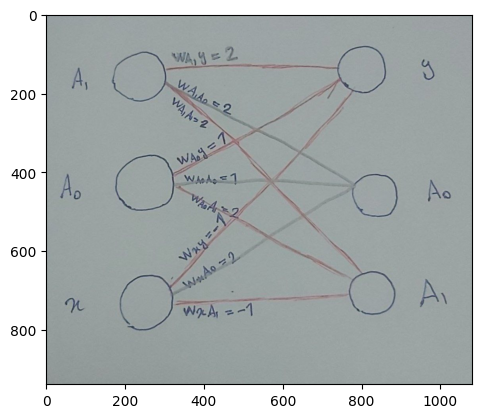

In [4]:
image = mpimg.imread("pic5.jpg")
plt.imshow(image)
plt.show()

#### Code Implementation for neuron:

Using the defined weights, we build the McCulloch-Pitts network based on a weight matrix and defined Treshold. with defining 3 function, we can Using the following 3 functions, we can implement and check the acceptance of a string, state table and network activation function.

In [5]:
class McCullochPitts:
    
    def __init__(self, threshold:int) -> None:
        #defining the weights of neurons:
        self.weights = [[2, 2, -1],
                        [2, 1, 2],
                        [2, 1, -1]]
        
        #Treshold
        self.T = threshold
    
    #Activation function according to the McCulloch-Pitts     
    def Sum(self,I:list, mode:str) -> int:
        sum = 0
        if mode == "a1":
            r = 0
        elif mode == "a0":
            r = 1
        else:
            r = 2
        for i in range(3):
            sum += self.weights[r][i]*I[i]
        if sum >= self.T:
            return 1
        else:
            return 0
        
    #Printing State table by using defined weights    
    def Run(self):
        print("a1|a0|x  | a1`|a0`|y")
        for a1 in [0,1]:
            for a0 in [0,1]:
                for x in [0,1]:
                    line = str(a1)+" |"+str(a0)+" |"+str(x)+"  | "
                    line += str(self.Sum([a1,a0,x],"a1")) + " | "
                    line += str(self.Sum([a1,a0,x],"a0")) + " | "
                    line += str(self.Sum([a1,a0,x],"y"))
                    print(line)
    
    #a function that get a string and return true if string is accepted by dfa                
    def Accept(self, word:str) -> bool:
        a1,a0 = 0,0
        for w in word[:-1]:
            A1 = self.Sum([a1,a0,int(w)],"a1")
            A0 = self.Sum([a1,a0,int(w)],"a0")
            a1,a0 = A1,A0
        return self.Sum([a1,a0,int(word[-1])],"y")
                    
                    

In [6]:
#MP neuron
m = McCullochPitts(2)

#printing state table
m.Run()

string = "00000001110101"
m.Accept(string)==1

a1|a0|x  | a1`|a0`|y
0 |0 |0  | 0 | 0 | 0
0 |0 |1  | 0 | 1 | 0
0 |1 |0  | 1 | 0 | 0
0 |1 |1  | 0 | 1 | 0
1 |0 |0  | 1 | 1 | 1
1 |0 |1  | 0 | 1 | 0
1 |1 |0  | 1 | 1 | 1
1 |1 |1  | 1 | 1 | 1


False